## Autor:
Andrea Campillo Piqueras.
## Estudios:
Universidad Internacional de La Rioja.
Escuela Superior de Ingeniería y Tecnología.<br>
Trabajo Fin de Máster Universitario en Análisis y Visualización de Datos Masivos/ Visual Analytics and Big Data.
## Título:
PrediDia: Un Enfoque Predictivo para la Evaluación de la Diabetes.
## Repositorio:
https://github.com/AndreaCampillo/TFM_PrediDia
## Licencia:
MIT License Copyright (c) 2024 Andrea Campillo Piqueras.

## <center><H1>Gestion de Ficheros</H1></center>

In [1]:
# Librerias utilizadas
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

 # 2021 Diabéticos y No Diabéticos

In [2]:
url = 'https://github.com/AndreaCampillo/TFM_PrediDia/raw/Datasets/2021DataSet_Diabeticos_NoDiabeticos.csv'
dfDiabetes_load = pd.read_csv(url, sep=';')
#dfDiabetes_load = pd.read_csv('2021DataSet_Diabeticos_NoDiabeticos.csv', sep=';')

In [3]:
dfDiabetes_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437708 entries, 0 to 437707
Data columns (total 45 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Year                437708 non-null  int64
 1   CatBMI              437708 non-null  int64
 2   Stroke              437708 non-null  int64
 3   HeartDis            437708 non-null  int64
 4   PhysExer            437708 non-null  int64
 5   HealthIns           437708 non-null  int64
 6   NoMedCost           437708 non-null  int64
 7   GenHealth           437708 non-null  int64
 8   CogDiff             437708 non-null  int64
 9   Depression          437708 non-null  int64
 10  MentalHlth          437708 non-null  int64
 11  MentalState         437708 non-null  int64
 12  PhysHlth            437708 non-null  int64
 13  WalkDiff            437708 non-null  int64
 14  Gender              437708 non-null  int64
 15  AgeRange            437708 non-null  int64
 16  EdLevel             

In [4]:
# Estudio preliminar del DataSet
dfDiabetes_load.head()

,Year,CatBMI,Stroke,HeartDis,PhysExer,HealthIns,NoMedCost,GenHealth,CogDiff,Depression,...,FruitCons,VegCons,FruitOrVegCon,FruitAndVegCon,MarijuanaCon,SleepHours,BrDiabetes,GrDiabetes,SupGrPreDiabetes,SupGrNoPreDiabetes
0,2021,1,2,2,2,1,2,2,2,2,...,1,1,1,1,9,99,3,3,2,2
1,2021,9,2,1,1,1,2,1,1,2,...,1,1,1,1,9,99,1,1,1,1
2,2021,3,2,1,2,1,2,1,2,2,...,1,2,1,2,9,99,1,1,1,1
3,2021,4,2,2,1,1,2,1,2,2,...,1,1,1,1,9,99,1,1,1,1
4,2021,3,1,1,1,1,2,2,2,2,...,1,1,1,1,9,99,1,1,1,1


In [5]:
df_21_Dia_NoDia_Depurado = dfDiabetes_load.loc[(dfDiabetes_load['CatBMI'] != 9) &
                                               (dfDiabetes_load['Stroke'] != 9) & 
                                               (dfDiabetes_load['HeartDis'] != 9) &
                                               (dfDiabetes_load['PhysExer'] != 9) &
                                               (dfDiabetes_load['HealthIns'] != 9) &
                                               (dfDiabetes_load['NoMedCost'] != 9) &
                                               (dfDiabetes_load['GenHealth'] != 9) &
                                               (dfDiabetes_load['CogDiff'] != 9) &
                                               (dfDiabetes_load['Depression'] != 9) &
                                               (dfDiabetes_load['MentalHlth'] != 9) & 
                                               (dfDiabetes_load['MentalState'] != 9) & 
                                               (dfDiabetes_load['PhysHlth'] != 9) &  
                                               (dfDiabetes_load['WalkDiff'] != 9) & 
                                               (dfDiabetes_load['Gender'] != 9) &  
                                               (dfDiabetes_load['AgeRange'] != 9) &
                                               (dfDiabetes_load['EdLevel'] != 9) & 
                                               (dfDiabetes_load['SocClass'] != 9) & 
                                               (dfDiabetes_load['UrologyDz'] != 9) &  
                                               (dfDiabetes_load['VisionDiff'] != 9) &  
                                               (dfDiabetes_load['Asthma'] != 9) &
                                               (dfDiabetes_load['LungDiseases'] != 9) & 
                                               (dfDiabetes_load['Arthritis'] != 9) & 
                                               (dfDiabetes_load['SmokerTrad'] != 9) & 
                                               (dfDiabetes_load['ECigSmok'] != 9) & 
                                               (dfDiabetes_load['AlcDrinker'] != 9) & 
                                               (dfDiabetes_load['Race'] != 9) & 
                                               (dfDiabetes_load['MaritalSt'] != 9) & 
                                               (dfDiabetes_load['LastMedChk'] != 9) &  
#                                              (dfDiabetes_load['Awareness'] != 9) & 
#                                              (dfDiabetes_load['FootIrrita'] != 9) & 
#                                              (dfDiabetes_load['FecFootIrrita'] != 9) & 
                                               (dfDiabetes_load['HighBP'] != 9) & 
                                               (dfDiabetes_load['HighChol'] != 9) & 
                                               (dfDiabetes_load['FruitCons'] != 9) & 
                                               (dfDiabetes_load['VegCons'] != 9) & 
                                               (dfDiabetes_load['FruitOrVegCon'] != 9)] 

In [6]:
df_21_Dia_NoDia_Depurado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229655 entries, 0 to 437707
Data columns (total 45 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Year                229655 non-null  int64
 1   CatBMI              229655 non-null  int64
 2   Stroke              229655 non-null  int64
 3   HeartDis            229655 non-null  int64
 4   PhysExer            229655 non-null  int64
 5   HealthIns           229655 non-null  int64
 6   NoMedCost           229655 non-null  int64
 7   GenHealth           229655 non-null  int64
 8   CogDiff             229655 non-null  int64
 9   Depression          229655 non-null  int64
 10  MentalHlth          229655 non-null  int64
 11  MentalState         229655 non-null  int64
 12  PhysHlth            229655 non-null  int64
 13  WalkDiff            229655 non-null  int64
 14  Gender              229655 non-null  int64
 15  AgeRange            229655 non-null  int64
 16  EdLevel             

In [7]:
# Algunos datos del DataSet
print('Numero of filas: ', len(df_21_Dia_NoDia_Depurado) , ' y columnas: ', len(df_21_Dia_NoDia_Depurado.columns) , '\n')

Numero of filas:  229655  y columnas:  45 



In [8]:
# Generación del dataset depurado preparado para el EDA
df_21_Dia_NoDia_Depurado.to_csv('2021DataSet_Diabeticos_NoDiabeticos_Depurado.csv', sep=';', index=False)

# 2021 Diabéticos No Definidos

In [9]:
url = 'https://github.com/AndreaCampillo/TFM_PrediDia/raw/Datasets/2021DataSet_NoDefinidosDiabetes.csv'
#url = '2021DataSet_NoDefinidosDiabetes.csv'
dfDiabetes_load = pd.read_csv(url, sep=';')

In [10]:
df_21_DiabetesNoDefinidos = dfDiabetes_load.loc[(dfDiabetes_load['CatBMI'] != 9) &
                                               (dfDiabetes_load['Stroke'] != 9) & 
                                               (dfDiabetes_load['HeartDis'] != 9) &
                                               (dfDiabetes_load['PhysExer'] != 9) &
                                               (dfDiabetes_load['HealthIns'] != 9) &
                                               (dfDiabetes_load['NoMedCost'] != 9) &
                                               (dfDiabetes_load['GenHealth'] != 9) &
                                               (dfDiabetes_load['CogDiff'] != 9) &
                                               (dfDiabetes_load['Depression'] != 9) &
                                               (dfDiabetes_load['MentalHlth'] != 9) & 
                                               (dfDiabetes_load['MentalState'] != 9) & 
                                               (dfDiabetes_load['PhysHlth'] != 9) &  
                                               (dfDiabetes_load['WalkDiff'] != 9) & 
                                               (dfDiabetes_load['Gender'] != 9) &  
                                               (dfDiabetes_load['AgeRange'] != 9) &
                                               (dfDiabetes_load['EdLevel'] != 9) & 
                                               (dfDiabetes_load['SocClass'] != 9) & 
                                               (dfDiabetes_load['UrologyDz'] != 9) &  
                                               (dfDiabetes_load['VisionDiff'] != 9) &  
                                               (dfDiabetes_load['Asthma'] != 9) &
                                               (dfDiabetes_load['LungDiseases'] != 9) & 
                                               (dfDiabetes_load['Arthritis'] != 9) & 
                                               (dfDiabetes_load['SmokerTrad'] != 9) & 
                                               (dfDiabetes_load['ECigSmok'] != 9) & 
                                               (dfDiabetes_load['AlcDrinker'] != 9) & 
                                               (dfDiabetes_load['Race'] != 9) & 
                                               (dfDiabetes_load['MaritalSt'] != 9) & 
                                               (dfDiabetes_load['LastMedChk'] != 9) &  
#                                              (dfDiabetes_load['Awareness'] != 9) & 
#                                              (dfDiabetes_load['FootIrrita'] != 9) & 
#                                              (dfDiabetes_load['FecFootIrrita'] != 9) & 
                                               (dfDiabetes_load['HighBP'] != 9) & 
                                               (dfDiabetes_load['HighChol'] != 9) & 
                                               (dfDiabetes_load['FruitCons'] != 9) & 
                                               (dfDiabetes_load['VegCons'] != 9) & 
                                               (dfDiabetes_load['FruitOrVegCon'] != 9)] 

In [11]:
df_21_DiabetesNoDefinidos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 21 to 979
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                126 non-null    int64
 1   CatBMI              126 non-null    int64
 2   Stroke              126 non-null    int64
 3   HeartDis            126 non-null    int64
 4   PhysExer            126 non-null    int64
 5   HealthIns           126 non-null    int64
 6   NoMedCost           126 non-null    int64
 7   GenHealth           126 non-null    int64
 8   CogDiff             126 non-null    int64
 9   Depression          126 non-null    int64
 10  MentalHlth          126 non-null    int64
 11  MentalState         126 non-null    int64
 12  PhysHlth            126 non-null    int64
 13  WalkDiff            126 non-null    int64
 14  Gender              126 non-null    int64
 15  AgeRange            126 non-null    int64
 16  EdLevel             126 non-null    int64
 

In [12]:
# Algunos datos del DataSet
print('Numero of filas: ', len(df_21_DiabetesNoDefinidos) , ' y columnas: ', len(df_21_DiabetesNoDefinidos.columns) , '\n')

Numero of filas:  126  y columnas:  45 



In [13]:
# Generación del dataset depurado preparado para el EDA
df_21_DiabetesNoDefinidos.to_csv('2021DataSet_NoDefinidosDiabetes_Depurado.csv', sep=';', index=False)

 # 2022 Diabéticos y No Diabéticos

In [14]:
url = 'https://github.com/AndreaCampillo/TFM_PrediDia/raw/Datasets/2022DataSet_Diabeticos_NoDiabeticos.csv'
#url = '2022DataSet_Diabeticos_NoDiabeticos.csv'
dfDiabetes_load = pd.read_csv(url, sep=';')

In [15]:
dfDiabetes_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444045 entries, 0 to 444044
Data columns (total 45 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Year                444045 non-null  int64
 1   CatBMI              444045 non-null  int64
 2   Stroke              444045 non-null  int64
 3   HeartDis            444045 non-null  int64
 4   PhysExer            444045 non-null  int64
 5   HealthIns           444045 non-null  int64
 6   NoMedCost           444045 non-null  int64
 7   GenHealth           444045 non-null  int64
 8   CogDiff             444045 non-null  int64
 9   Depression          444045 non-null  int64
 10  MentalHlth          444045 non-null  int64
 11  MentalState         444045 non-null  int64
 12  PhysHlth            444045 non-null  int64
 13  WalkDiff            444045 non-null  int64
 14  Gender              444045 non-null  int64
 15  AgeRange            444045 non-null  int64
 16  EdLevel             

In [16]:
# Estudio preliminar del DataSet
dfDiabetes_load.head()

,Year,CatBMI,Stroke,HeartDis,PhysExer,HealthIns,NoMedCost,GenHealth,CogDiff,Depression,...,FruitCons,VegCons,FruitOrVegCon,FruitAndVegCon,MarijuanaCon,SleepHours,BrDiabetes,GrDiabetes,SupGrPreDiabetes,SupGrNoPreDiabetes
0,2022,9,2,2,2,9,2,1,2,2,...,9,9,9,9,9,8,1,1,1,1
1,2022,3,2,2,2,1,2,1,2,2,...,9,9,9,9,9,6,3,3,2,2
2,2022,3,2,2,1,1,2,1,2,2,...,9,9,9,9,9,5,3,3,2,2
3,2022,2,2,2,1,9,2,1,2,2,...,9,9,9,9,9,7,3,3,2,2
4,2022,2,2,2,1,1,2,2,2,2,...,9,9,9,9,9,9,3,3,2,2


In [17]:
df_22_Dia_NoDia_Depurado = dfDiabetes_load.loc[(dfDiabetes_load['CatBMI'] != 9) &
                                               (dfDiabetes_load['Stroke'] != 9) & 
                                               (dfDiabetes_load['HeartDis'] != 9) &
                                               (dfDiabetes_load['PhysExer'] != 9) &
                                               (dfDiabetes_load['HealthIns'] != 9) &
                                               (dfDiabetes_load['NoMedCost'] != 9) &
                                               (dfDiabetes_load['GenHealth'] != 9) &
                                               (dfDiabetes_load['CogDiff'] != 9) &
                                               (dfDiabetes_load['Depression'] != 9) &
                                               (dfDiabetes_load['MentalHlth'] != 9) & 
                                               (dfDiabetes_load['MentalState'] != 9) & 
                                               (dfDiabetes_load['PhysHlth'] != 9) &  
                                               (dfDiabetes_load['WalkDiff'] != 9) & 
                                               (dfDiabetes_load['Gender'] != 9) &  
                                               (dfDiabetes_load['AgeRange'] != 9) &
                                               (dfDiabetes_load['EdLevel'] != 9) & 
                                               (dfDiabetes_load['SocClass'] != 9) & 
                                               (dfDiabetes_load['UrologyDz'] != 9) &  
                                               (dfDiabetes_load['VisionDiff'] != 9) &  
                                               (dfDiabetes_load['Asthma'] != 9) &
                                               (dfDiabetes_load['LungDiseases'] != 9) & 
                                               (dfDiabetes_load['Arthritis'] != 9) & 
                                               (dfDiabetes_load['SmokerTrad'] != 9) & 
                                               (dfDiabetes_load['ECigSmok'] != 9) & 
                                               (dfDiabetes_load['AlcDrinker'] != 9) & 
                                               (dfDiabetes_load['Race'] != 9) & 
                                               (dfDiabetes_load['MaritalSt'] != 9) & 
                                               (dfDiabetes_load['LastMedChk'] != 9)]    
#                                              (dfDiabetes_load['Awareness'] != 9) & 
#                                              (dfDiabetes_load['FootIrrita'] != 9) & 
#                                              (dfDiabetes_load['FecFootIrrita'] != 9) & 
#                                              (dfDiabetes_load['HighBP'] != 9) & 
#                                              (dfDiabetes_load['HighChol'] != 9) & 
#                                              (dfDiabetes_load['FruitCons'] != 9) & 
#                                              (dfDiabetes_load['VegCons'] != 9) & 
#                                              (dfDiabetes_load['FruitOrVegCon'] != 9)

In [18]:
df_22_Dia_NoDia_Depurado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273937 entries, 1 to 444044
Data columns (total 45 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Year                273937 non-null  int64
 1   CatBMI              273937 non-null  int64
 2   Stroke              273937 non-null  int64
 3   HeartDis            273937 non-null  int64
 4   PhysExer            273937 non-null  int64
 5   HealthIns           273937 non-null  int64
 6   NoMedCost           273937 non-null  int64
 7   GenHealth           273937 non-null  int64
 8   CogDiff             273937 non-null  int64
 9   Depression          273937 non-null  int64
 10  MentalHlth          273937 non-null  int64
 11  MentalState         273937 non-null  int64
 12  PhysHlth            273937 non-null  int64
 13  WalkDiff            273937 non-null  int64
 14  Gender              273937 non-null  int64
 15  AgeRange            273937 non-null  int64
 16  EdLevel             

In [19]:
# Algunos datos del DataSet
print('Numero of filas: ', len(df_22_Dia_NoDia_Depurado) , ' y columnas: ', len(df_22_Dia_NoDia_Depurado.columns) , '\n')

Numero of filas:  273937  y columnas:  45 



In [20]:
# Generación del dataset depurado preparado para el EDA
df_22_Dia_NoDia_Depurado.to_csv('2022DataSet_Diabeticos_NoDiabeticos_Depurado.csv', sep=';', index=False)

# Pruebas desde GitHub


In [21]:
url = 'https://github.com/AndreaCampillo/TFM_PrediDia/raw/Datasets/2021DataSet_Diabeticos_NoDiabeticos_Depurado.csv'
dfDiabetes_load = pd.read_csv(url, sep=';')

In [22]:
dfDiabetes_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229655 entries, 0 to 229654
Data columns (total 45 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Year                229655 non-null  int64
 1   CatBMI              229655 non-null  int64
 2   Stroke              229655 non-null  int64
 3   HeartDis            229655 non-null  int64
 4   PhysExer            229655 non-null  int64
 5   HealthIns           229655 non-null  int64
 6   NoMedCost           229655 non-null  int64
 7   GenHealth           229655 non-null  int64
 8   CogDiff             229655 non-null  int64
 9   Depression          229655 non-null  int64
 10  MentalHlth          229655 non-null  int64
 11  MentalState         229655 non-null  int64
 12  PhysHlth            229655 non-null  int64
 13  WalkDiff            229655 non-null  int64
 14  Gender              229655 non-null  int64
 15  AgeRange            229655 non-null  int64
 16  EdLevel             

In [23]:
dfDiabetes_load.head()

,Year,CatBMI,Stroke,HeartDis,PhysExer,HealthIns,NoMedCost,GenHealth,CogDiff,Depression,...,FruitCons,VegCons,FruitOrVegCon,FruitAndVegCon,MarijuanaCon,SleepHours,BrDiabetes,GrDiabetes,SupGrPreDiabetes,SupGrNoPreDiabetes
0,2021,1,2,2,2,1,2,2,2,2,...,1,1,1,1,9,99,3,3,2,2
1,2021,3,2,1,2,1,2,1,2,2,...,1,2,1,2,9,99,1,1,1,1
2,2021,4,2,2,1,1,2,1,2,2,...,1,1,1,1,9,99,1,1,1,1
3,2021,3,1,1,1,1,2,2,2,2,...,1,1,1,1,9,99,1,1,1,1
4,2021,2,2,2,2,1,2,1,2,2,...,2,2,2,2,9,99,3,3,2,2


In [24]:
url = 'https://github.com/AndreaCampillo/TFM_PrediDia/raw/Datasets/2021DataSet_NoDefinidosDiabetes_Depurado.csv'
dfDiabetes_load = pd.read_csv(url, sep=';')

In [25]:
dfDiabetes_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                126 non-null    int64
 1   CatBMI              126 non-null    int64
 2   Stroke              126 non-null    int64
 3   HeartDis            126 non-null    int64
 4   PhysExer            126 non-null    int64
 5   HealthIns           126 non-null    int64
 6   NoMedCost           126 non-null    int64
 7   GenHealth           126 non-null    int64
 8   CogDiff             126 non-null    int64
 9   Depression          126 non-null    int64
 10  MentalHlth          126 non-null    int64
 11  MentalState         126 non-null    int64
 12  PhysHlth            126 non-null    int64
 13  WalkDiff            126 non-null    int64
 14  Gender              126 non-null    int64
 15  AgeRange            126 non-null    int64
 16  EdLevel             126 non-null    int64
 1

In [26]:
dfDiabetes_load.head()

,Year,CatBMI,Stroke,HeartDis,PhysExer,HealthIns,NoMedCost,GenHealth,CogDiff,Depression,...,FruitCons,VegCons,FruitOrVegCon,FruitAndVegCon,MarijuanaCon,SleepHours,BrDiabetes,GrDiabetes,SupGrPreDiabetes,SupGrNoPreDiabetes
0,2021,4,2,2,1,1,2,1,2,2,...,1,1,1,1,9,99,7,9,9,9
1,2021,4,2,1,2,1,2,1,2,2,...,1,1,1,1,9,99,7,9,9,9
2,2021,4,2,2,2,1,2,2,1,1,...,2,2,2,2,9,99,7,9,9,9
3,2021,4,2,1,2,1,2,2,2,2,...,1,2,1,2,9,99,9,9,9,9
4,2021,4,2,2,1,1,1,2,2,2,...,2,2,2,2,9,99,7,9,9,9


In [27]:
url = 'https://github.com/AndreaCampillo/TFM_PrediDia/raw/Datasets/2021_22DataSet_Diabeticos_NoDiabeticos_Depurado.csv'
dfDiabetes_load = pd.read_csv(url, sep=';')    

In [28]:
dfDiabetes_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503592 entries, 0 to 503591
Data columns (total 45 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Year                503592 non-null  int64
 1   CatBMI              503592 non-null  int64
 2   Stroke              503592 non-null  int64
 3   HeartDis            503592 non-null  int64
 4   PhysExer            503592 non-null  int64
 5   HealthIns           503592 non-null  int64
 6   NoMedCost           503592 non-null  int64
 7   GenHealth           503592 non-null  int64
 8   CogDiff             503592 non-null  int64
 9   Depression          503592 non-null  int64
 10  MentalHlth          503592 non-null  int64
 11  MentalState         503592 non-null  int64
 12  PhysHlth            503592 non-null  int64
 13  WalkDiff            503592 non-null  int64
 14  Gender              503592 non-null  int64
 15  AgeRange            503592 non-null  int64
 16  EdLevel             

In [29]:
dfDiabetes_load.head()

,Year,CatBMI,Stroke,HeartDis,PhysExer,HealthIns,NoMedCost,GenHealth,CogDiff,Depression,...,FruitCons,VegCons,FruitOrVegCon,FruitAndVegCon,MarijuanaCon,SleepHours,BrDiabetes,GrDiabetes,SupGrPreDiabetes,SupGrNoPreDiabetes
0,2021,1,2,2,2,1,2,2,2,2,...,1,1,1,1,9,99,3,3,2,2
1,2021,3,2,1,2,1,2,1,2,2,...,1,2,1,2,9,99,1,1,1,1
2,2021,4,2,2,1,1,2,1,2,2,...,1,1,1,1,9,99,1,1,1,1
3,2021,3,1,1,1,1,2,2,2,2,...,1,1,1,1,9,99,1,1,1,1
4,2021,2,2,2,2,1,2,1,2,2,...,2,2,2,2,9,99,3,3,2,2


# Pruebas de partición de datos

In [30]:
url = 'https://github.com/AndreaCampillo/TFM_PrediDia/raw/Datasets/2021DataSet_Diabeticos_NoDiabeticos_Depurado.csv'
dfDiabetes_load = pd.read_csv(url, sep=';')

In [31]:
dfDiabetes_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229655 entries, 0 to 229654
Data columns (total 45 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Year                229655 non-null  int64
 1   CatBMI              229655 non-null  int64
 2   Stroke              229655 non-null  int64
 3   HeartDis            229655 non-null  int64
 4   PhysExer            229655 non-null  int64
 5   HealthIns           229655 non-null  int64
 6   NoMedCost           229655 non-null  int64
 7   GenHealth           229655 non-null  int64
 8   CogDiff             229655 non-null  int64
 9   Depression          229655 non-null  int64
 10  MentalHlth          229655 non-null  int64
 11  MentalState         229655 non-null  int64
 12  PhysHlth            229655 non-null  int64
 13  WalkDiff            229655 non-null  int64
 14  Gender              229655 non-null  int64
 15  AgeRange            229655 non-null  int64
 16  EdLevel             

In [32]:
dfDiabetes_load.head()

,Year,CatBMI,Stroke,HeartDis,PhysExer,HealthIns,NoMedCost,GenHealth,CogDiff,Depression,...,FruitCons,VegCons,FruitOrVegCon,FruitAndVegCon,MarijuanaCon,SleepHours,BrDiabetes,GrDiabetes,SupGrPreDiabetes,SupGrNoPreDiabetes
0,2021,1,2,2,2,1,2,2,2,2,...,1,1,1,1,9,99,3,3,2,2
1,2021,3,2,1,2,1,2,1,2,2,...,1,2,1,2,9,99,1,1,1,1
2,2021,4,2,2,1,1,2,1,2,2,...,1,1,1,1,9,99,1,1,1,1
3,2021,3,1,1,1,1,2,2,2,2,...,1,1,1,1,9,99,1,1,1,1
4,2021,2,2,2,2,1,2,1,2,2,...,2,2,2,2,9,99,3,3,2,2


In [33]:
# Se obtienen los datasets de entrenamiento (train), validación (val) y pruebas (test)
train_set, test_set = train_test_split(dfDiabetes_load, test_size=0.4, random_state=14, shuffle=True, stratify=dfDiabetes_load['SupGrPreDiabetes'])
val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=14, shuffle=True, stratify=test_set['SupGrPreDiabetes'])

X_train = train_set.drop('SupGrPreDiabetes', axis=1)
y_train = train_set['SupGrPreDiabetes'].copy()

X_val = val_set.drop('SupGrPreDiabetes', axis=1)
y_val = val_set['SupGrPreDiabetes'].copy()

X_test = test_set.drop('SupGrPreDiabetes', axis=1)
y_test = test_set['SupGrPreDiabetes'].copy()

In [34]:
# Se comprueba que las cantidades de cada dataset es la esperada
print("Logintud del Training set:", len(train_set))
print("Logintud del Validation set:", len(val_set))
print("Logintud del Test set:", len(test_set))

Logintud del Training set: 137793
Logintud del Validation set: 45931
Logintud del Test set: 45931


<AxesSubplot:>

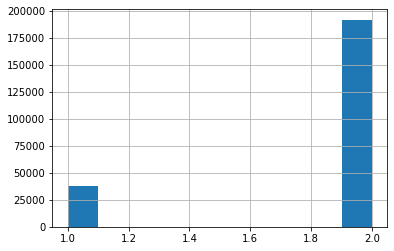

In [35]:
# Se comprueba que los distintos datasets de entrenamiento (train), validación (val) y pruebas (test) conservan la proporción
# de diabéticos y no diabéticos
dfDiabetes_load['SupGrPreDiabetes'].hist()

<AxesSubplot:>

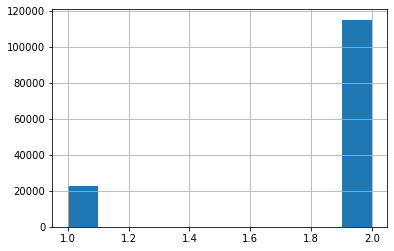

In [36]:
train_set['SupGrPreDiabetes'].hist()

<AxesSubplot:>

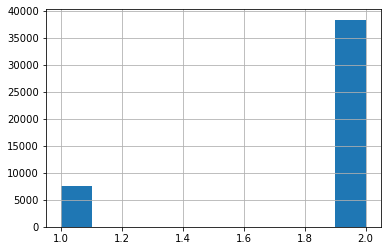

In [37]:
val_set['SupGrPreDiabetes'].hist()

<AxesSubplot:>

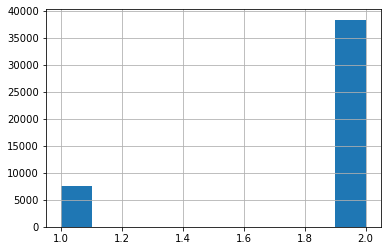

In [38]:
test_set['SupGrPreDiabetes'].hist()